In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf
import mplfinance as mpf

In [2]:
pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [3]:
start_date='2014-01-01'
end_date='2024-12-21'

stock='GOOG'

data=yf.download(stock,start_date,end_date)

[*********************100%%**********************]  1 of 1 completed


DATA CLEANING AND ANALYSIS

In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-27,185.645004,187.500000,185.449997,186.860001,186.860001,13025700
2024-06-28,185.720001,186.580002,183.324997,183.419998,183.419998,23032400
2024-07-01,184.479996,185.339996,182.729996,184.490005,184.490005,11815900
2024-07-02,183.470001,186.949997,183.059998,186.610001,186.610001,12555500
2024-07-03,186.300003,187.619995,185.384995,187.389999,187.389999,7409100


In [5]:
data.reset_index(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13720\2565748210.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


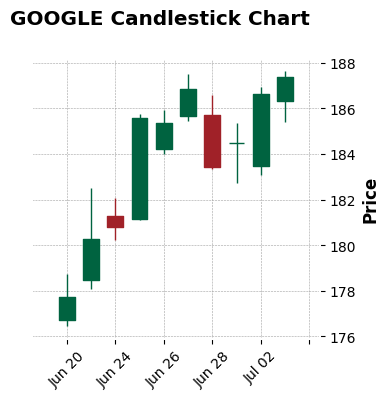

In [6]:
data_last_20 = data.tail(10)
data_last_20.set_index('Date',inplace=True)
my_style = mpf.make_mpf_style(
    base_mpf_style='charles',
    rc={'figure.facecolor': 'white', 'axes.labelsize': 12, 'xtick.labelsize': 10, 'ytick.labelsize': 10}
)
fig, axlist = mpf.plot(
    data_last_20, 
    type='candle', 
    style=my_style, 
    title='GOOGLE Candlestick Chart', 
    figsize=(4,4), 
    returnfig=True
)

# Customize the chart further if needed
fig.tight_layout()
plt.show()

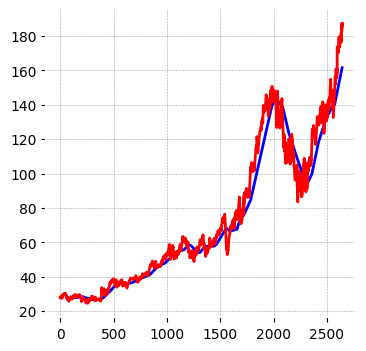

In [7]:
ma_100_days= data.Close.rolling(100).mean()
plt.figure(figsize=(4,4))
plt.plot(ma_100_days,'b')
plt.plot(data.Close,'r')


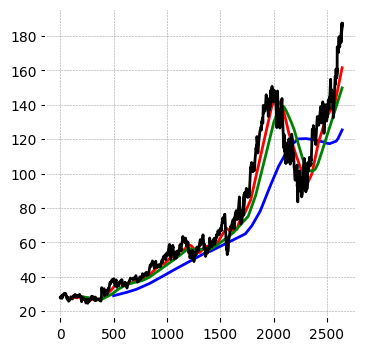

In [8]:
ma_200_days=data.Close.rolling(200).mean()
ma_500_days= data.Close.rolling(500).mean()
plt.figure(figsize=(4,4))
plt.plot(ma_500_days,'b')
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'g')
plt.plot(data.Close,'black');

Text(0.5, 1.0, 'Volume Traded')

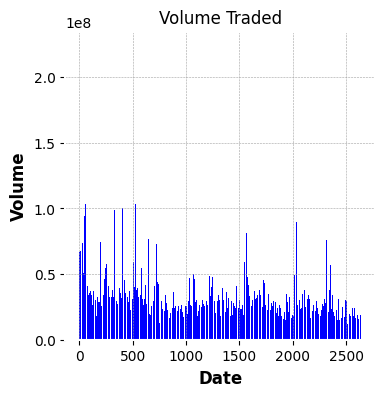

In [9]:
fig5 = plt.figure(figsize=(4,4))
plt.bar(data.index, data['Volume'], color='blue')
plt.xlabel('Date')   
plt.ylabel('Volume')
plt.title('Volume Traded')

In [10]:
data.dropna(inplace=True)


DATA SPLITING

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_test.shape[0]

529

In [13]:
data_train.shape[0]

2114

In [14]:
print(data_test.shape[0]+data_train.shape[0])
print(data.shape)

2643
(2643, 7)


SLICING WITH MinMaxScaler

In [15]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    


In [18]:
x, y = np.array(x), np.array(y)

In [19]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [20]:
model=Sequential([
    LSTM(units=50,activation='relu',return_sequences= True, input_shape=(x.shape[1],1)),
    Dropout(0.2),
    LSTM(units=60,activation='relu',return_sequences= True),
    Dropout(0.3),
    LSTM(units=80,activation='relu',return_sequences= True),
    Dropout(0.4),
    LSTM(units=120,activation='relu'),
    Dropout(0.5),
    Dense(units=1)
])
model.summary()

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - loss: 0.0652
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0074
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0049
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0061
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0050
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0046
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0050
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0041
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0039
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0055
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - loss: 0.0039
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - loss: 0.0037
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0033
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0036
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - l

In [23]:
pas_100_days=data_train.tail(100)

In [24]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

In [228]:
model.save('stock_prediction_model.keras')

AttributeError: 'LinearRegression' object has no attribute 'save'